In [9]:
import pandas as pd
import sklearn.preprocessing
import itertools
import networkx as nx
import igraph as ig
import leidenalg as la
from cdlib import algorithms

filename = 'C:/Users/Sri/OneDrive/Desktop/Winter 2022/M168 - Intro to Networks/MarvelMovies edgelist.xlsx'
MCU_df = pd.read_excel(filename, header = None)
le = sklearn.preprocessing.LabelEncoder()
le.fit(list(MCU_df[0]) + list(MCU_df [1]))
l1 = le.transform(MCU_df[0])
l2 = le.transform(MCU_df[1])
edges = list(zip(l1,l2))

g = nx.Graph()
for pair in edges:
    g.add_edges_from(itertools.combinations(pair,2))

In [10]:
coms = algorithms.leiden(g)
coms.communities

[[9, 8, 13, 15, 17, 10, 7, 11, 6, 1, 0, 18, 12, 5, 4], [2, 16, 14, 3]]

In [12]:
coms.average_internal_degree()

FitnessResult(min=3.0, max=12.4, score=7.7, std=4.7)

In [13]:
coms.average_internal_degree(summary=False) #since we only have 2 communities

[12.4, 3.0]

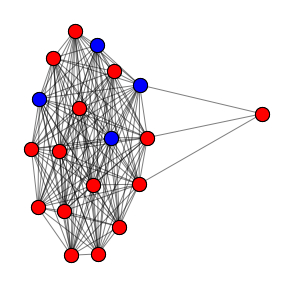

In [18]:
from cdlib import viz
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos, figsize=(5, 5))

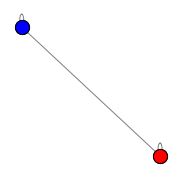

In [19]:
viz.plot_community_graph(g, coms, figsize=(3, 3))

In [21]:
from cdlib import evaluation
mod = evaluation.newman_girvan_modularity(g,coms)

In [22]:
mod

FitnessResult(min=None, max=None, score=-0.02089497041420118, std=None)